In [1]:
import torch

In [2]:
torch.cuda.is_available()

True

In [3]:
data = {
        # "SquuezeViT_3_NIH_EXP_1":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp1/epoch_100.pth"),
        # "DenseNet_121_Pretrained":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp2/epoch_100.pth"),
        # "DenseNet_121_init":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp3/epoch_100.pth"),
        # "DenseNet_2":torch.load("/home/karan/Documents/GitHub/BTP/checkpoints/exp4/epoch_100.pth"),
        "SqueezeVIT":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp101/epoch_100.pth"),
        "SqueezeNet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp107/epoch_100.pth"),
        "Densenet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp103/epoch_100.pth"),
        "Mobilenet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp105/epoch_100.pth"),
        "Resnet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp109/epoch_100.pth"),
        "Shufflenet":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp110/epoch_100.pth"),
        "MobileVit":torch.load("/home/karan/Documents/BTP_Proj/checkpoints/finalexp108/epoch_100.pth")
}

In [4]:
# data["final Exp 1"]["history"]["test"].keys()

In [5]:
Epoch = 100

In [6]:
loss_data = {}

In [7]:
# data["Test Exp"]["history"]['val']['F1Score']

In [8]:
for exps in data.keys():
    train_loss = []
    val_loss = []
    for i in data[exps]["history"]['train']["loss"]:
        val = i.cpu().item()
        train_loss.append(val)
    for i in data[exps]["history"]['val']["loss"]:
        val = i.cpu().item()
        # print(val)
        val_loss.append(val)
    loss_data[exps] = (train_loss,val_loss)

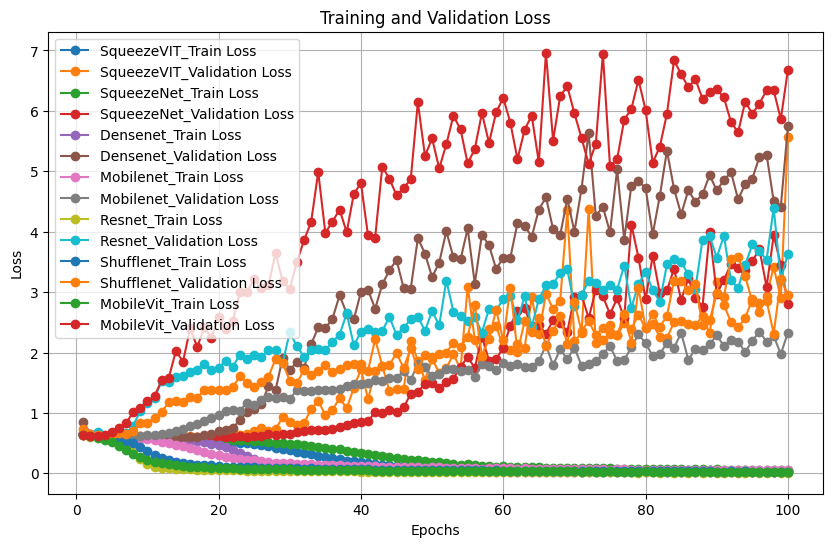

In [9]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, Epoch+1))
# train_loss = data['train']["loss"]
# val_loss = data['val']["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
for exps in loss_data.keys():
    plt.plot(epochs, loss_data[exps][0], label=exps + '_Train Loss', marker='o')
    plt.plot(epochs, loss_data[exps][1], label=exps + '_Validation Loss', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()


In [10]:
import plotly.graph_objects as go

# Create the interactive plot
fig = go.Figure()
for exps in loss_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    fig.add_trace(go.Scatter(x=epochs, y=loss_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=loss_data[exps][1], mode='lines+markers', name=exps + '_Validation Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Training and Validation Loss',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    grid=dict(),
)

fig.show()

In [11]:
acc_data = {}
for exps in data.keys():
    train_acc = []
    val_acc = []
    for i in data[exps]["history"]['train']["ExactMatchAccuracy"]:
        val = i
        train_acc.append(val)
    for i in data[exps]["history"]['val']["ExactMatchAccuracy"]:
        val = i
        # print(val)
        val_acc.append(val)
    acc_data[exps] = (train_acc,val_acc)

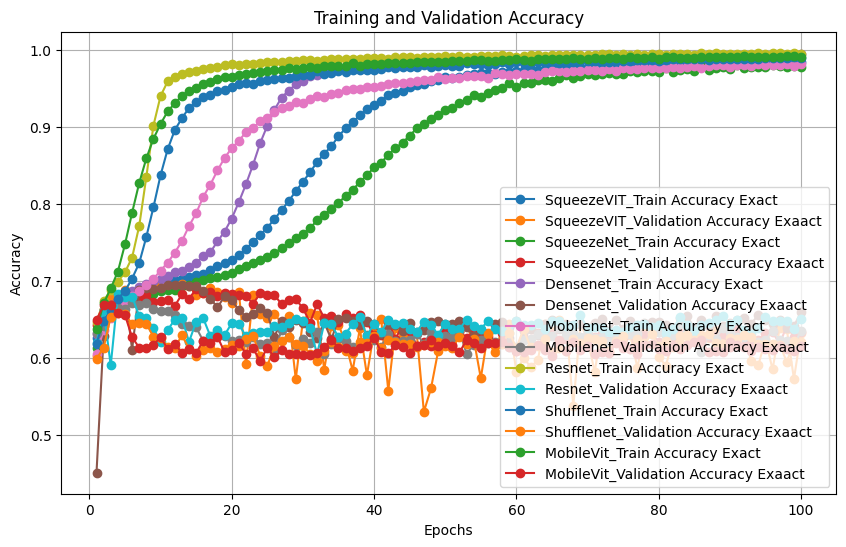

In [12]:
import matplotlib.pyplot as plt

# Example data
epochs = list(range(1, Epoch + 1))
# train_loss = data['train']["loss"]
# val_loss = data['val']["loss"]

# Create the plot
plt.figure(figsize=(10, 6))
for exps in loss_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + '_Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + '_Validation Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][0], label=exps + '_Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + '_Validation Loss', marker='o')
    plt.plot(epochs, acc_data[exps][0], label=exps + '_Train Accuracy Exact', marker='o')
    plt.plot(epochs, acc_data[exps][1], label=exps + '_Validation Accuracy Exaact', marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [13]:

# Create the interactive plot
fig = go.Figure()
for exps in loss_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    fig.add_trace(go.Scatter(x=epochs, y=acc_data[exps][0], mode='lines+markers', name=exps + '_Train Accuracy'))
    fig.add_trace(go.Scatter(x=epochs, y=acc_data[exps][1], mode='lines+markers', name=exps + '_Validation Accuracy'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Training and Validation Accuracy',
    xaxis_title='Epochs',
    yaxis_title='Loss',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    grid=dict(),
)

fig.show()

In [14]:
val_auroc_data = {}
for exps in data.keys():
    avg_auroc = []
    for epoch, score_list in enumerate(data[exps]["history"]['val']['MultiLabelAUROC']):
        avg_auroc.append(sum(score_list)/len(score_list))
    val_auroc_data[exps] = avg_auroc

In [15]:
train_auroc_data = {}
for exps in data.keys():
    avg_auroc = []
    for epoch, score_list in enumerate(data[exps]["history"]['train']['MultiLabelAUROC']):
        avg_auroc.append(sum(score_list)/len(score_list))
    train_auroc_data[exps] = avg_auroc

In [16]:
test_auroc_data = {}
for exps in data.keys():
    avg_auroc = []
    for epoch, score_list in enumerate(data[exps]["history"]['test']['MultiLabelAUROC']):
        avg_auroc.append(sum(score_list)/len(score_list))
    test_auroc_data[exps] = avg_auroc

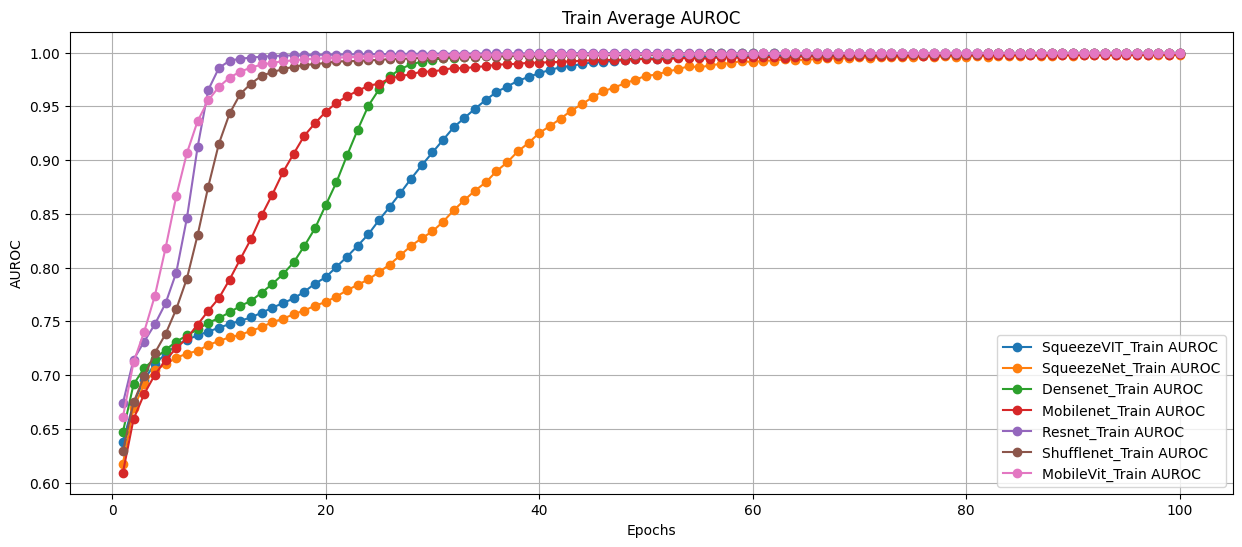

In [17]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in train_auroc_data.keys():
    plt.plot(epochs, train_auroc_data[exps], label=exps + '_Train AUROC', marker='o')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Train Average AUROC')
plt.legend()
plt.grid(True)
plt.show()

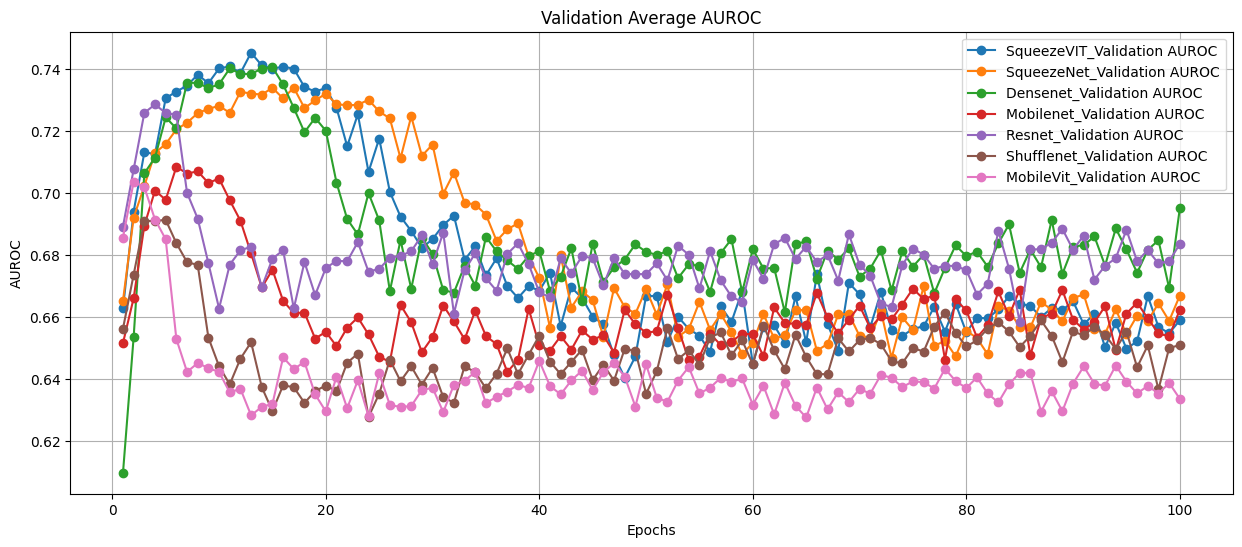

In [18]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in val_auroc_data.keys():
    plt.plot(epochs, val_auroc_data[exps], label=exps + '_Validation AUROC', marker='o')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Validation Average AUROC')
plt.legend()
plt.grid(True)
plt.show()

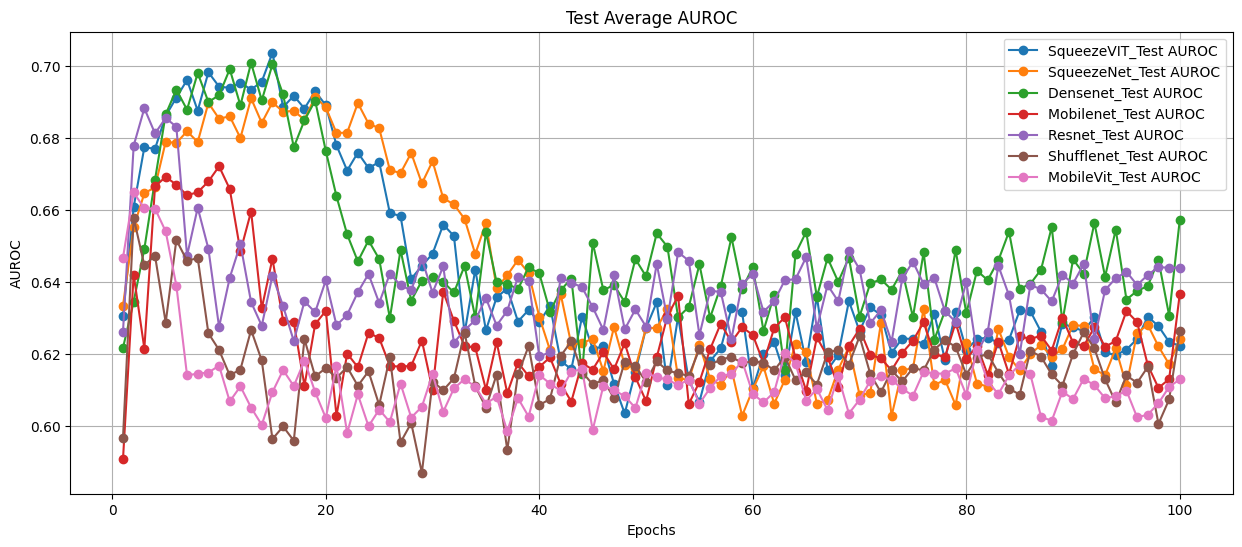

In [19]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in test_auroc_data.keys():
    plt.plot(epochs, test_auroc_data[exps], label=exps + '_Test AUROC', marker='o')
plt.xlabel('Epochs')
plt.ylabel('AUROC')
plt.title('Test Average AUROC')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
fig = go.Figure()
for exps in train_auroc_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=train_auroc_data[exps], mode='lines+markers', name=exps + '_Train AUROC'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Train Average AUROC',
    xaxis_title='Epochs',
    yaxis_title='AUROC',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [21]:
import plotly.graph_objects as go

# Create the interactive plot
fig = go.Figure()
for exps in val_auroc_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=val_auroc_data[exps], mode='lines+markers', name=exps + '_Validation AUROC'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Validation Average AUROC',
    xaxis_title='Epochs',
    yaxis_title='AUROC',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [22]:
fig = go.Figure()
for exps in test_auroc_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=test_auroc_data[exps], mode='lines+markers', name=exps + '_Test AUROC'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Test Average AUROC',
    xaxis_title='Epochs',
    yaxis_title='AUROC',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [23]:
train_f1score_data = {}
for exps in data.keys():
    avg_f1score = []
    for epoch, score_list in enumerate(data[exps]["history"]['train']['F1Score']):
        avg_f1score.append(sum(score_list)/len(score_list))
    train_f1score_data[exps] = avg_f1score

In [24]:
val_f1score_data = {}
for exps in data.keys():
    avg_f1score = []
    for epoch, score_list in enumerate(data[exps]["history"]['val']['F1Score']):
        avg_f1score.append(sum(score_list)/len(score_list))
    val_f1score_data[exps] = avg_f1score

In [25]:
test_f1score_data = {}
for exps in data.keys():
    avg_f1score = []
    for epoch, score_list in enumerate(data[exps]["history"]['test']['F1Score']):
        avg_f1score.append(sum(score_list)/len(score_list))
    test_f1score_data[exps] = avg_f1score

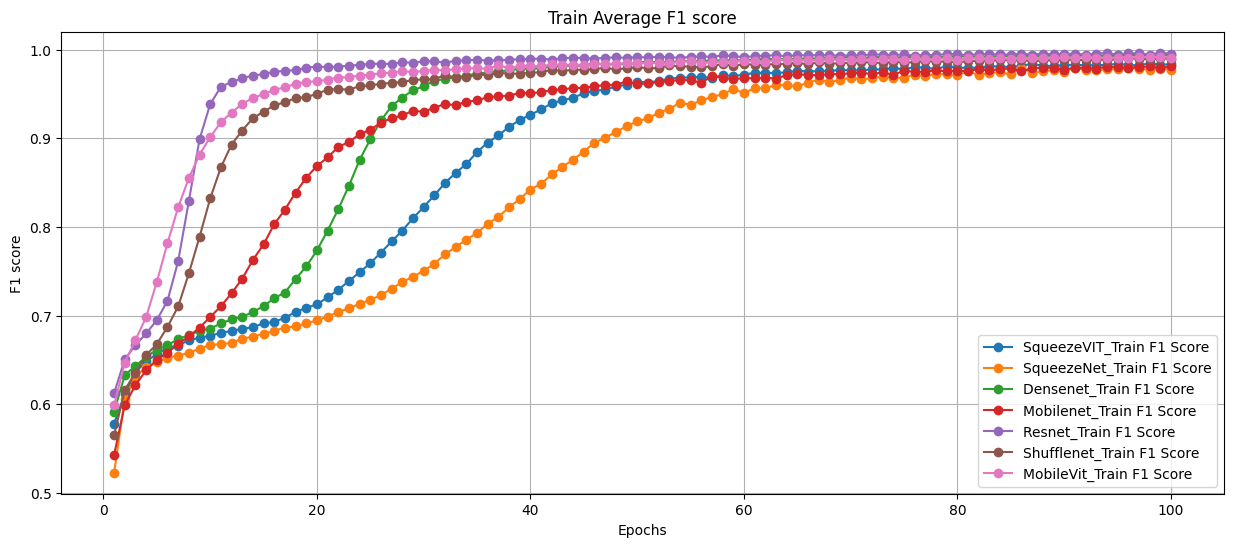

In [26]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in train_f1score_data.keys():
    plt.plot(epochs, train_f1score_data[exps], label=exps + '_Train F1 Score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.title('Train Average F1 score')
plt.legend()
plt.grid(True)
plt.show()

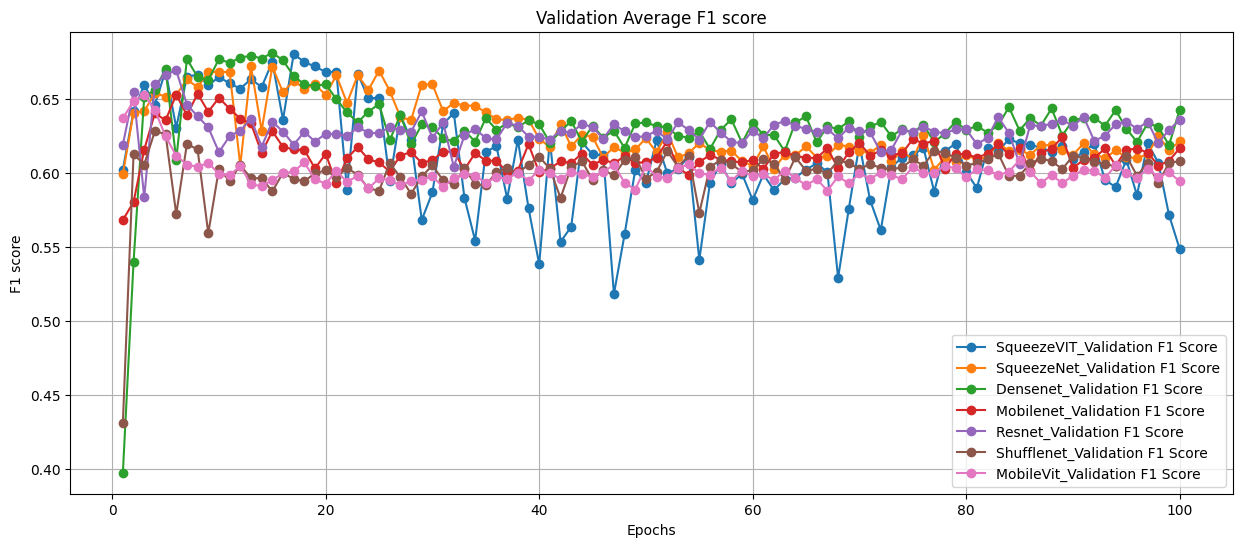

In [27]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in val_f1score_data.keys():
    plt.plot(epochs, val_f1score_data[exps], label=exps + '_Validation F1 Score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.title('Validation Average F1 score')
plt.legend()
plt.grid(True)
plt.show()

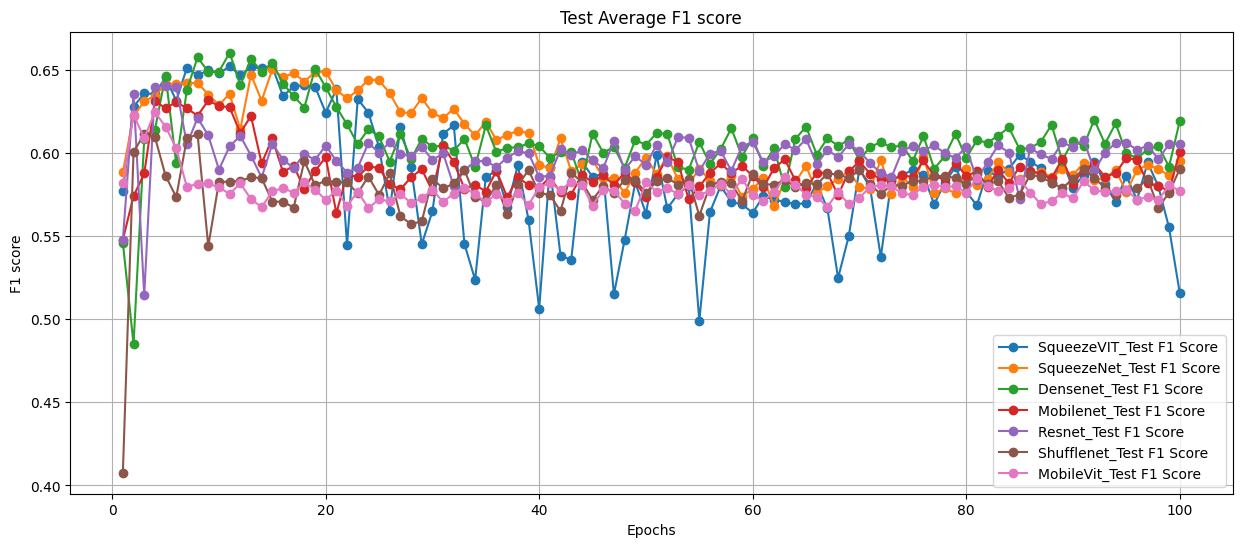

In [28]:
plt.figure(figsize=(15, 6))
epochs = list(range(1, Epoch + 1))
for exps in test_f1score_data.keys():
    plt.plot(epochs, test_f1score_data[exps], label=exps + '_Test F1 Score', marker='o')
plt.xlabel('Epochs')
plt.ylabel('F1 score')
plt.title('Test Average F1 score')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
fig = go.Figure()
for exps in train_f1score_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=train_f1score_data[exps], mode='lines+markers', name=exps + '_Train F1 Score'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Train Average F1 Score',
    xaxis_title='Epochs',
    yaxis_title='F1 Score',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [30]:
fig = go.Figure()
for exps in val_f1score_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=val_f1score_data[exps], mode='lines+markers', name=exps + '_Validation F1 Score'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Validaton Average F1 Score',
    xaxis_title='Epochs',
    yaxis_title='F1 Score',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [31]:
fig = go.Figure()
for exps in test_f1score_data.keys():
    # plt.plot(epochs, loss_data[exps][0], label=exps + 'Train Loss', marker='o')
    # plt.plot(epochs, loss_data[exps][1], label=exps + 'Validation Loss', marker='o')
    # fig.add_trace(go.Scatter(x=epochs, y=auroc_data[exps][0], mode='lines+markers', name=exps + '_Train Loss'))
    fig.add_trace(go.Scatter(x=epochs, y=test_f1score_data[exps], mode='lines+markers', name=exps + '_Test F1 Score'))
# fig.add_trace(go.Scatter(x=epochs, y=train_loss, mode='lines+markers', name='Train Loss'))
# fig.add_trace(go.Scatter(x=epochs, y=val_loss, mode='lines+markers', name='Validation Loss'))

fig.update_layout(
    title='Test Average F1 Score',
    xaxis_title='Epochs',
    yaxis_title='F1 Score',
    xaxis=dict(tickmode='linear'),
    yaxis=dict(tickmode='linear'),
    # legend=dict(x=0, y=1),
    # grid=dict(),
)

fig.show()

In [33]:
import numpy
print("NIH BINARY")
print()
for key in test_auroc_data.keys():
    print(key, numpy.argmax(test_auroc_data[key]))

NIH BINARY

SqueezeVIT 14
SqueezeNet 18
Densenet 12
Mobilenet 9
Resnet 2
Shufflenet 1
MobileVit 1
